<a href="https://colab.research.google.com/github/angelaguzmanar/Marketing/blob/main/Explorci%C3%B3n_de_datos_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


In [3]:

##### conectarse a BD #######
conn= sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')
cur=conn.cursor()

### para ver las tablas que hay en la base de datos
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

######1 ejercicios sql con base de movies(estudiantes) ###

###1
pd.read_sql("select * from movies", conn)

dfmovies= pd.read_sql("select * from movies", conn) ### convertir resultados de una consulta en una tabla de pandas
dfmovies.info()

dfmovies.to_sql('ratings_copia',conn, if_exists='replace' ) ## llevar tabla de pandas a base de datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


9742

In [4]:
pd.read_sql("select * from ratings", conn)

dfratings= pd.read_sql("select * from ratings", conn) ### convertir resultados de una consulta en una tabla de pandas
dfratings.info()

dfratings.to_sql('ratings_copia',conn, if_exists='replace' ) ## llevar tabla de pandas a base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


100836

In [5]:
dfmovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
df_explo=pd.read_csv('https://raw.githubusercontent.com/angelaguzmanar/Marketing/main/data_exploracion.csv')
df_explo

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,1,4.0,964982703,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
1,5,1,4.0,847434962,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
2,7,1,4.5,1106635946,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
3,15,1,2.5,1510577970,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
4,17,1,4.5,1305696483,Toy Story (1995),False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1971
100833,610,160836,3.0,1493844794,Hazard (2005),False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,2005
100834,610,163937,3.5,1493848789,Blair Witch (2016),False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,2016


In [7]:
# Conecta a la base de datos SQLite
conn = sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')

# Guarda el DataFrame en la base de datos
df_explo.to_sql('exploracion', conn, index=False, if_exists='replace')

100836

In [8]:

# Conecta a la base de datos SQLite
conn = sql.connect('/content/drive/MyDrive/Analitica3/Entrega_Marketing/db_movies')

cur=conn.cursor()

### para ver las tablas que hay en la base de datos
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()


[('ratings',), ('movies',), ('ratings_copia',), ('exploracion',)]

In [9]:
######1 ejercicios sql con base de movies(estudiantes) ###

###1
pd.read_sql("select * from exploracion", conn)

dfmovies= pd.read_sql("select * from exploracion", conn) ### convertir resultados de una consulta en una tabla de pandas
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   timestamp           100836 non-null  int64  
 4   title               100836 non-null  object 
 5   (no genres listed)  100836 non-null  int64  
 6   Action              100836 non-null  int64  
 7   Adventure           100836 non-null  int64  
 8   Animation           100836 non-null  int64  
 9   Children            100836 non-null  int64  
 10  Comedy              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Documentary         100836 non-null  int64  
 13  Drama               100836 non-null  int64  
 14  Fantasy             100836 non-null  int64  
 15  Film-Noir           100836 non-nul

In [10]:
cr=pd.read_sql(""" select rating as rating,
                          count(*) as conteo
                          from exploracion
                          group by rating
                          order by conteo desc""", conn)
###Nombres de columnas con numeros o guiones se deben poner en doble comilla para que se reconozcan


data  = go.Bar( x=cr.rating,y=cr.conteo, text=cr.conteo, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)

In [11]:
### calcular cada usuario cuántas peliculas calificó
rating_users=pd.read_sql(''' select userId,
                         count(*) as cnt_rat
                         from exploracion
                        group by userId
                         order by cnt_rat asc
                         ''',conn )

fig  = px.histogram(rating_users, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones por usario')

fig.show()

In [12]:
rating_users.describe() #La mayoria se encuentra por debajo de 200, pero si es posible ver 2700 peliculas mas o menos en la mitad de la vida de una perona
#¿Es necesario establecer un limite o se puede dejar?
#El minimo es 20, que es un buen número y el maximo es 2698

,userId,cnt_rat
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


In [13]:
#### verificar cuantas calificaciones tiene cada pelicula
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from exploracion
                         group by "movieId"
                         order by cnt_rat desc
                         ''',conn )

### graficar distribucion

fig  = px.histogram(rating_movies, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones para cada pelicula')
fig.show()

In [14]:
rating_movies.describe() #El + del 50% tienen 1 calificacion, muy pocas tienen muchas calificaciones

,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


In [21]:
#### verificar cuantas calificaciones tiene cada pelicula
rating_movies=pd.read_sql(''' select movieId ,
                         count(*) as cnt_rat
                         from exploracion
                         group by "movieId"
                         having cnt_rat>=5
                         order by cnt_rat desc
                         ''',conn )

### analizar distribucion de calificaciones por pelicula
rating_movies.describe()

### graficar distribucion

fig  = px.histogram(rating_movies, x= 'cnt_rat', title= 'Hist frecuencia de numero de calificaciones para cada pelicula')
fig.show()

In [22]:
rating_movies

,movieId,cnt_rat
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
3645,102,5
3646,75,5
3647,71,5
3648,68,5


In [91]:
df_cop = df_explo.copy()

In [98]:
genre_counts = df_cop.iloc[:, 6:-1].sum()

In [99]:
genre_counts

Action         30635
Adventure      24161
Animation       6988
Children        9208
Comedy         39053
Crime          16681
Documentary     1219
Drama          41928
Fantasy        11834
Film-Noir        870
Horror          7291
IMAX            4145
Musical         4138
Mystery         7674
Romance        18124
Sci-Fi         17243
Thriller       26452
War             4859
Western         1930
dtype: int64

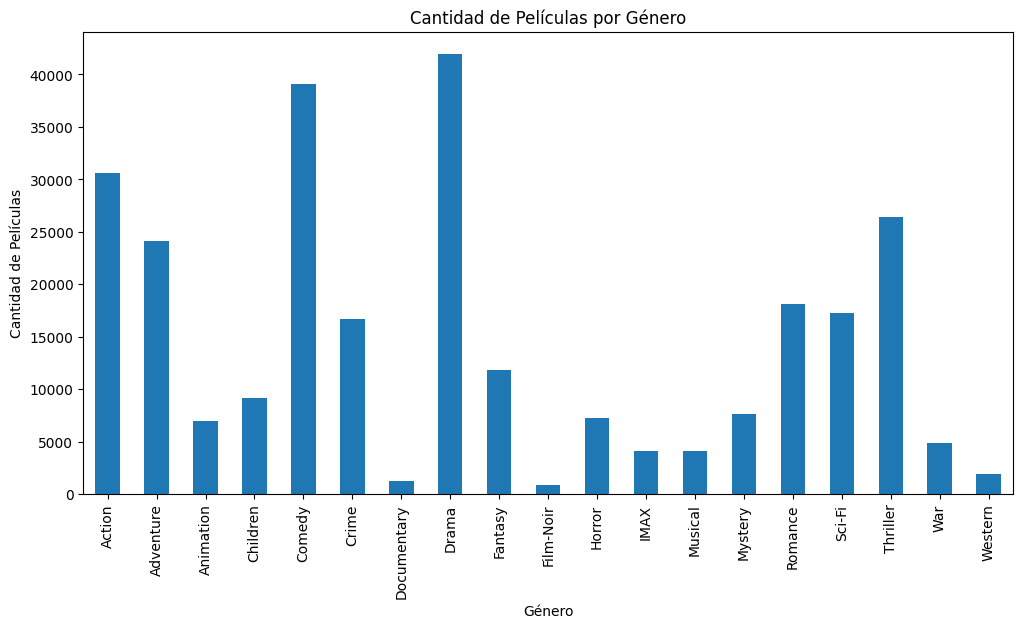

In [100]:
# Crear un gráfico de barras para mostrar la cantidad de películas por género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Cantidad de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.show()

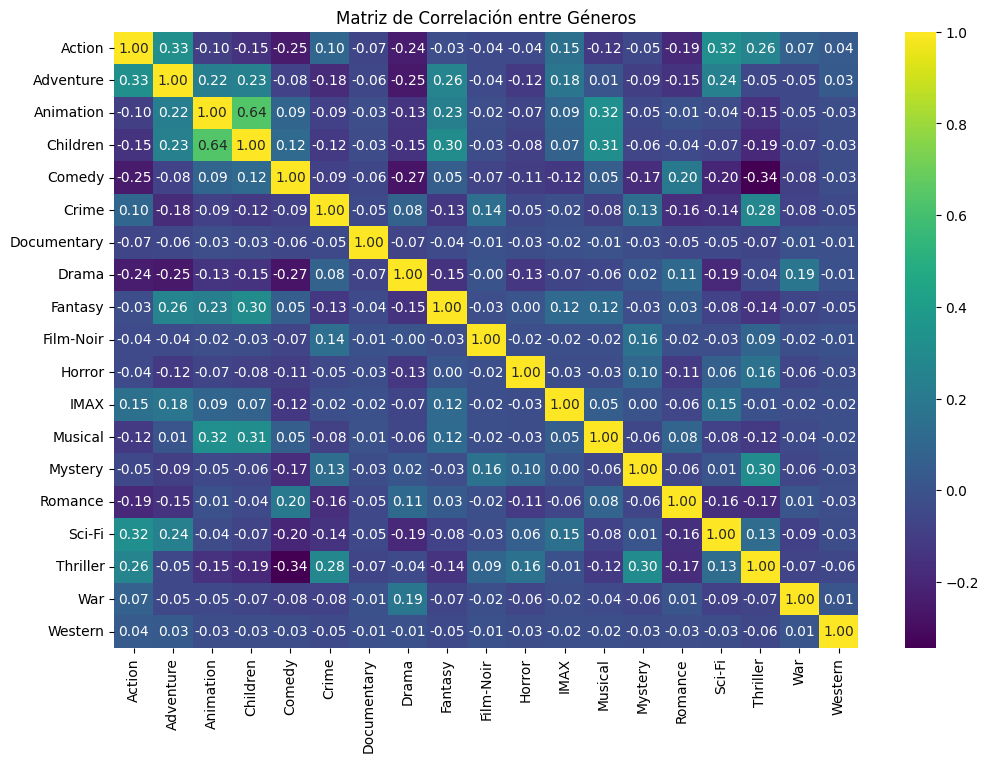

In [101]:
# Selecciona las columnas de género
genre_columns = df_cop.columns[6:-1]

# Calcula la matriz de correlación entre géneros
genre_correlation = df_cop[genre_columns].corr()

# Visualiza la matriz de correlación como un mapa de calor
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(genre_correlation, cmap='viridis', annot=True, fmt=".2f")
plt.title('Matriz de Correlación entre Géneros')
plt.show() #Con este analisis se observa que peliculas de un genero, tienden a ser de otro, la más "marcada es animación-niños"

In [102]:
df_explo['timestamp'].unique() #En qué formato estan los timestamp

array([ 964982703,  847434962, 1106635946, ..., 1493844794, 1493848789,
       1493850155])